# 03. Player Similarity

In [1]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from modules.fm_functions import *

In [3]:
# raw data
player_data_2023_raw = pd.read_csv('data/2023_FBRef_meandiff.csv', index_col=1).iloc[:, 3:]
player_data_2023_raw.index = player_data_2023_raw.index + '_2023'
player_data_2022_raw = pd.read_csv('data/2022_FBRef_meandiff.csv', index_col=1).iloc[:, 3:]
player_data_2022_raw.index = player_data_2022_raw.index + '_2022'

In [4]:
player_data_raw = pd.concat([player_data_2022_raw, player_data_2023_raw])

In [5]:
from sklearn.preprocessing import MinMaxScaler
player_data_scaled = MinMaxScaler().fit_transform(player_data_raw)
player_data_scaled = pd.DataFrame(player_data_scaled, index=player_data_raw.index, columns=player_data_raw.columns)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)

In [7]:
player_data_pca = pd.DataFrame(index=player_data_scaled.index)
pca_types_dict = {}
explained_variance_total = 0

for column_group in stat_types_dict.keys():
        current_columns = stat_types_dict[column_group]
        pca_result = pca.fit_transform(player_data_scaled[current_columns])
        pca_names = f'{column_group}_' + pca.get_feature_names_out()
        pca_types_dict[column_group] = pca_names.tolist()
        player_data_pca[pca_names] = pca_result
        explained_variance_total += pca.explained_variance_ratio_.sum()

explained_variance_total /= len(pca_types_dict)
explained_variance_total

0.8732491442573421

In [8]:
player_data_pca_scaled = MinMaxScaler().fit_transform(player_data_pca)
player_data_pca_scaled = pd.DataFrame(player_data_pca_scaled, index=player_data_pca.index, columns=player_data_pca.columns)

In [27]:
df1 = player_data_scaled[attack_columns]
df2 = player_data_pca_scaled[pca_types_dict['attack']]

correlations = pd.DataFrame(index=df1.columns, columns=df2.columns)

for col1 in df1.columns:
    for col2 in df2.columns:
        correlations.loc[col1, col2] = np.corrcoef(df1[col1], df2[col2])[0, 1]

print(correlations)

                       attack_pca0 attack_pca1 attack_pca2 attack_pca3
gca_SCATypes_TO           0.760586   -0.075261   -0.084873     0.01818
gca_SCATypes_Sh           0.770872   -0.217675   -0.018471   -0.372812
gca_SCATypes_Fld          0.821427   -0.143253    0.016555    0.529689
gca_SCATypes_Def          0.328704    0.457761    0.816054   -0.061787
gca_SCATypes_PassLive     0.783774    0.431042   -0.133079   -0.143104
gca_SCATypes_PassDead     0.394584     0.60548   -0.449083   -0.151131
shooting_Standard_Dist    0.120832    0.659613   -0.201092    0.219264
shooting_Expected_npxG    0.782848   -0.438373    0.059632   -0.284563


In [28]:
pca_explanation_dict = {'passing_pca0' : 'passing_volume',
                        'passing_pca1' : 'passing_aggression',
                        'defense_pca0' : 'defense_deep',
                        'defense_pca1' : 'defense_press',
                        'touches_pca0' : 'touches_volume',
                        'touches_pca1' : 'touches_attacking',
                        'progres_pca0' : 'progres_carry',
                        'progres_pca1' : 'progress_receive',
                        'attack_pca0' : 'shooting',
                        'attack_pca1' : 'creation',
                        'attack_pca2' : 'attack_press',
                        'attack_pca3' : 'foul_attraction',
                        'misc_pca0' : 'availability',
                        'misc_pca1' : 'offsides',
                        'misc_pca2' : 'aerial_volume'}

In [29]:
player_data_pca_scaled = player_data_pca_scaled.rename(columns=pca_explanation_dict)

In [30]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# similarity_matrix = cosine_similarity(player_data_pca_scaled)
similarity_matrix = euclidean_distances(player_data_pca_scaled)
similarity_matrix = pd.DataFrame(similarity_matrix, index=player_data_pca_scaled.index, columns=player_data_pca_scaled.index)

In [88]:
find_most_similar_strings('Ousmanne Diomande', similarity_matrix.index, n=10)

['Sinaly Diomande_2022',
 'Sinaly Diomande_2023',
 'Ousmane Dembélé_2022',
 'Ousmane Dembélé_2023',
 'Ousmane Camara_2022',
 'Sofiane Diop_2022',
 'Assane Diao_2023',
 'Ismael Diallo_2022',
 'Stéphane Diarra_2022',
 'Hannes Delcroix_2023']

In [113]:
similarity_matrix.loc['Anthony Gordon_2023'].sort_values(ascending=True)[21:41]
# similarity_matrix.loc['Kylian Mbappé_2023'].sort_values(ascending=False)[1:21]

_Player_
Luis Díaz_2023                0.407432
Nicolò Cambiaghi_2023         0.408487
Eberechi Eze_2023             0.409520
Solly March_2022              0.412124
Bukayo Saka_2023              0.419363
Takefusa Kubo_2023            0.421862
Isaac Palazón Camacho_2023    0.423579
Roberto Navarro_2023          0.426887
Antoine Griezmann_2022        0.427841
Tomáš Suslov_2023             0.431160
Domenico Berardi_2022         0.438240
Julien Ponceau_2023           0.439942
Armand Lauriente_2022         0.443359
Samuel Lino_2022              0.447481
Désiré Doué_2023              0.448615
Federico Chiesa_2023          0.450252
Ritsu Doan_2022               0.453691
Jan-Niklas Beste_2023         0.453825
Brenden Aaronson_2022         0.454491
Christoph Baumgartner_2022    0.455536
Name: Anthony Gordon_2023, dtype: float64

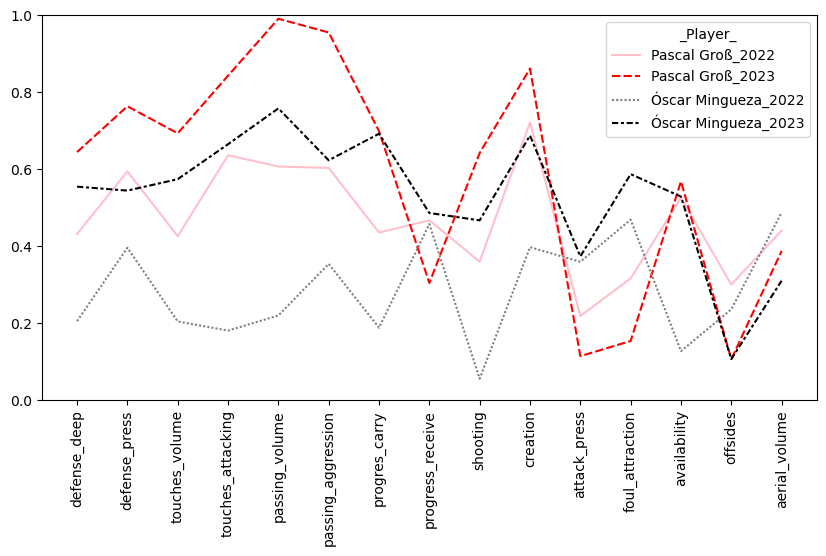

In [33]:
graph_players = ['Pascal Groß_2022',
                 'Pascal Groß_2023',
                 'Óscar Mingueza_2022',
                 'Óscar Mingueza_2023']

palette = ['pink',
           'red',
           'grey',
           'black']

fig, axs = plt.subplots(figsize=(10,5))
plt.ylim(0, 1)
plt.xticks(rotation=90)
sns.lineplot(data=player_data_pca_scaled.loc[graph_players].T, palette=palette)
plt.show()

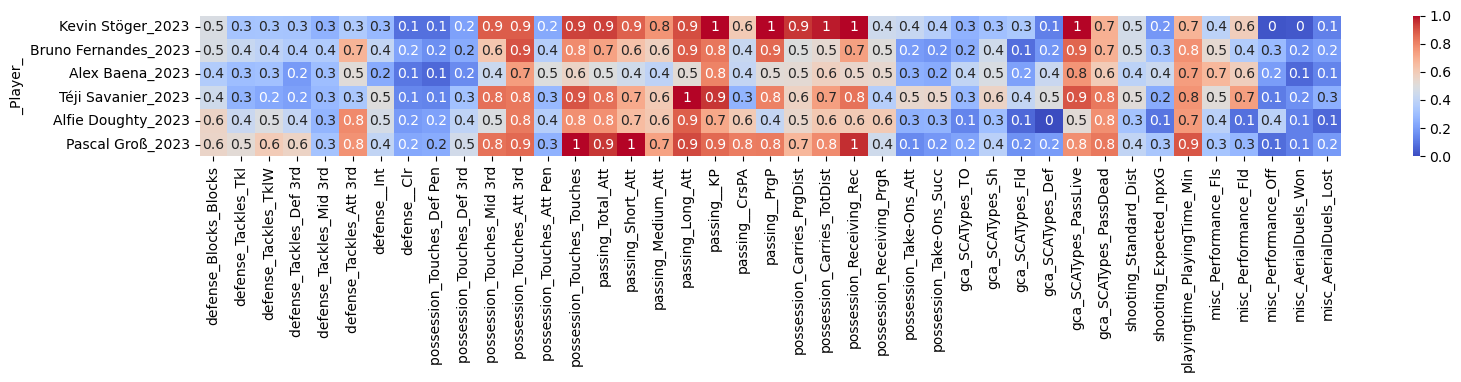

In [34]:
fig, ax = plt.subplots(figsize=(15,2))
plt.tight_layout()
heatmap_data = player_data_scaled.loc[['Kevin Stöger_2023', 'Bruno Fernandes_2023', 'Alex Baena_2023',
                                       'Téji Savanier_2023', 'Alfie Doughty_2023', 'Pascal Groß_2023']]
sns.heatmap(heatmap_data,
            cmap='coolwarm', annot=round(heatmap_data, 1))
plt.show()

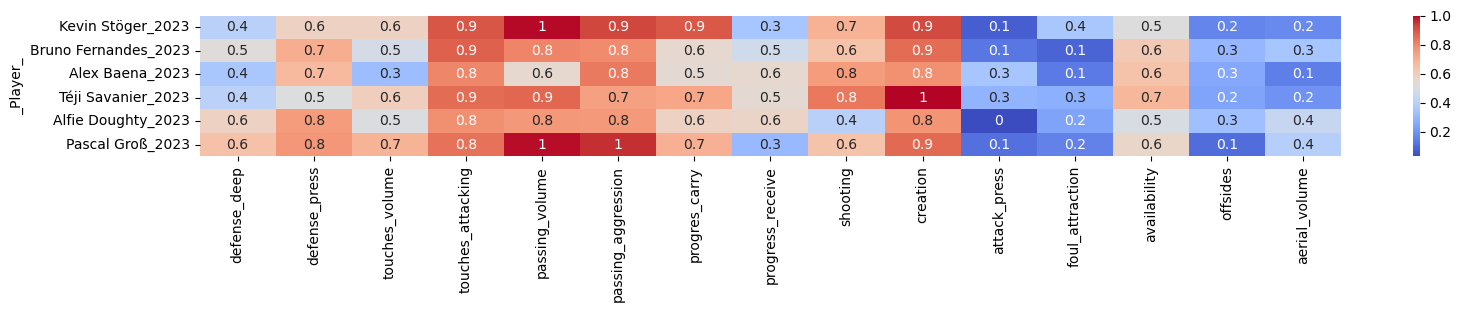

In [35]:
fig, ax = plt.subplots(figsize=(15,2))
plt.tight_layout()
heatmap_data = player_data_pca_scaled.loc[['Kevin Stöger_2023', 'Bruno Fernandes_2023', 'Alex Baena_2023',
                                           'Téji Savanier_2023', 'Alfie Doughty_2023', 'Pascal Groß_2023']]
sns.heatmap(heatmap_data,
            cmap='coolwarm', annot=round(heatmap_data, 1))
plt.show()

In [36]:
def plot_team_radar(data: dict, color='#FF5733') -> None:

    # Each attribute we'll plot in the radar chart.
    labels = list(data.keys())
    values = list(data.values())
    num_vars = len(labels)

    # Split the circle into even parts and save the angles
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Complete the loop and append the start value to the end.
    values += values[:1]
    labels += labels[:1]
    angles += angles[:1]

    # Create the figure and polar subplot
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    # Draw the outline of our data
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    # Fill it in
    ax.fill(angles, values, color=color, alpha=0.4)

    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label
    ax.set_thetagrids(np.degrees(angles), labels, fontsize=12, color='#4B0082')

    # Adjust alignment of labels
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # Ensure radar goes from 0 to 20
    ax.set_ylim(0, 1)
    ax.set_rgrids([0.25, 0.50, 0.75, 1.00], color='#AAAAAA', alpha=0.5)

    # Set position of y-labels
    ax.set_rlabel_position(180 / num_vars)

    # Customize appearance
    ax.tick_params(colors='#4B0082')
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(color='#DDDDDD', linestyle='--')
    ax.spines['polar'].set_color('#4B0082')
    ax.set_facecolor('#FAFAFA')

    # Set title with a stylish font
    # ax.set_title(data['name'], y=1.1, fontsize=20, color='#4B0082', fontweight='bold')
    plt.show()

In [167]:
find_most_similar_strings('morata', similarity_matrix.index, n=10)

['Álvaro Morata_2022',
 'Álvaro Morata_2023',
 'Franck Honorat_2022',
 'Franck Honorat_2023',
 'Sokratis Papastathopoulos_2023',
 'Wataru Endo_2022',
 'José Luis Morales_2022',
 'Borja Mayoral_2022',
 'Gonzalo Plata_2022',
 'Ramón Terrats_2022']

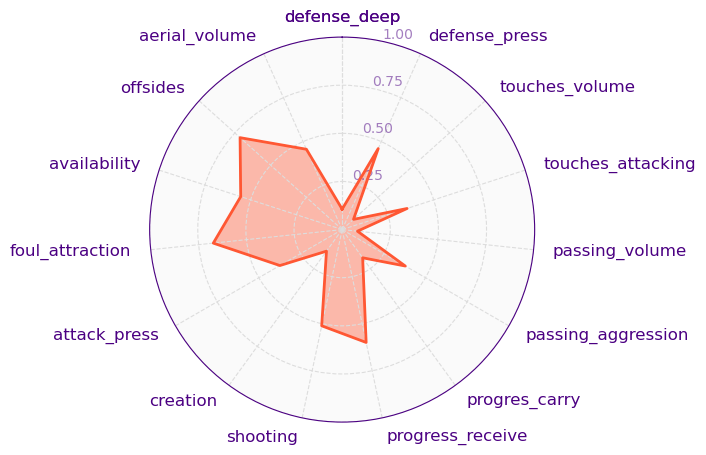

In [170]:
player = 'Álvaro Morata'
season = 2022

plot_data = player_data_pca_scaled.loc[f'{player}_{season}']
# plot_data.index = [idx[0] for idx in plot_data.index.str.split('_')]

plot_team_radar(plot_data.to_dict())

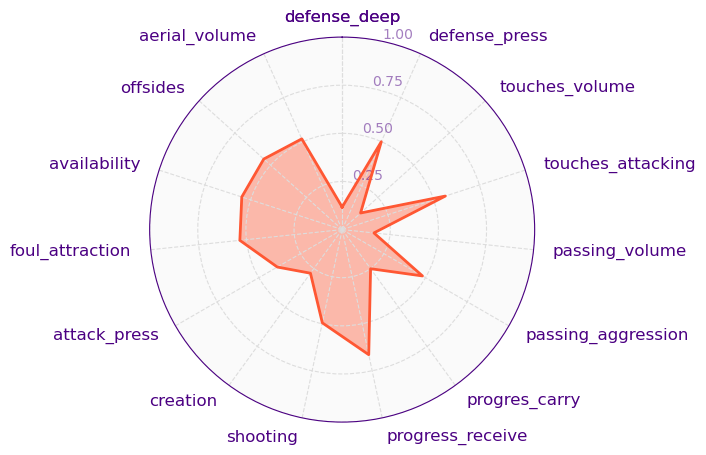

In [111]:
player = 'Nikola Krstović'
season = 2023

plot_data = player_data_pca_scaled.loc[f'{player}_{season}']
# plot_data.index = [idx[0] for idx in plot_data.index.str.split('_')]

plot_team_radar(plot_data.to_dict())

<Axes: >

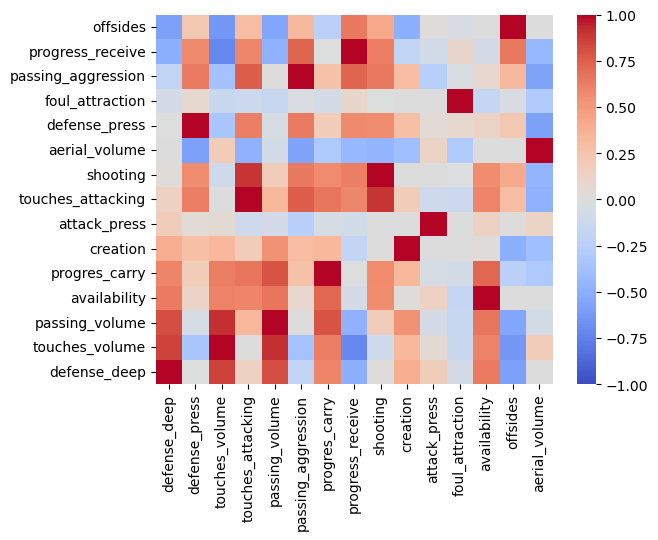

In [177]:
sns.heatmap(player_data_pca_scaled.corr().sort_values(by='defense_deep'), vmax=1, vmin=-1, cmap='coolwarm')